In [19]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy import stats
import numpy as np

In [10]:
# Step 1.1:  Load the dataset
data = pd.read_csv("Employee_Performance.csv")
data.describe()

,EmployeeID,Experience,TrainingHours,PerformanceRating,Salary
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,1734.500000,2.838556,32.144414,3.561512,16107.623297
std,423.919411,2.527657,10.106029,1.044987,12158.438481
min,1001.000000,0.000000,5.000000,1.000000,6000.000000
25%,1367.750000,1.000000,25.000000,2.840000,7700.000000
50%,1734.500000,2.000000,31.000000,3.630000,10100.000000
75%,2101.250000,4.000000,39.000000,4.330000,20000.000000
max,2468.000000,9.000000,50.000000,5.500000,53100.000000


In [11]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Employee_Performance.csv")

# Calculate the average mean of the performance rating for each department
mean_performance = data.groupby('Department')['PerformanceRating'].mean()

# Print the average mean of the performance rating for each department
print(mean_performance)



Department
HR           2.900476
IT           3.272014
Marketing    3.927500
Sales        3.926112
Name: PerformanceRating, dtype: float64


In [12]:
#Let's look for amount of missing data
num_missing = data.isnull().sum()
print("----Number of Missing Values or Values with ??:")
print(num_missing)
print("\n\n")

----Number of Missing Values or Values with ??:
EmployeeID           0
Department           0
Gender               0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               0
dtype: int64





In [14]:
#Step 2: Look for Negative Values
# Initialize a flag to track if negative values are found
negative_values_found = False
for column in data.columns:
    if pd.api.types.is_numeric_dtype(data[column]):
        negative_values_in_column = (data[column] < 0).any()
        if negative_values_in_column:
            print(f"Negative values found in column '{column}'.")
            negative_values_found = True
if not negative_values_found:
    print("No negative values found in the DataFrame.")


No negative values found in the DataFrame.


In [16]:
#Step 2:2 Find out if there are any duplicate rows
duplicates_false = data.duplicated(keep=False)
print("\n\nAmount of Duplicates in the Car dataset", duplicates_false)
# Use boolean indexing to filter the DataFrame to show only the duplicate rows
duplicate_rows = data[duplicates_false]
# Print the duplicate rows
print("\n\nFigure 2.1: Duplicate Rows of the Car dataset\n", duplicate_rows)
count_duplicates = duplicates_false.sum()
print("Figure 2.2 Number of Duplicate Rows:", count_duplicates)



Amount of Duplicates in the Car dataset 0       False
1       False
2       False
3       False
4       False
        ...  
1463    False
1464    False
1465    False
1466    False
1467    False
Length: 1468, dtype: bool


Figure 2.1: Duplicate Rows of the Car dataset
 Empty DataFrame
Columns: [EmployeeID, Department, Gender, Experience, TrainingHours, PerformanceRating, Salary]
Index: []
Figure 2.2 Number of Duplicate Rows: 0


C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\William\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


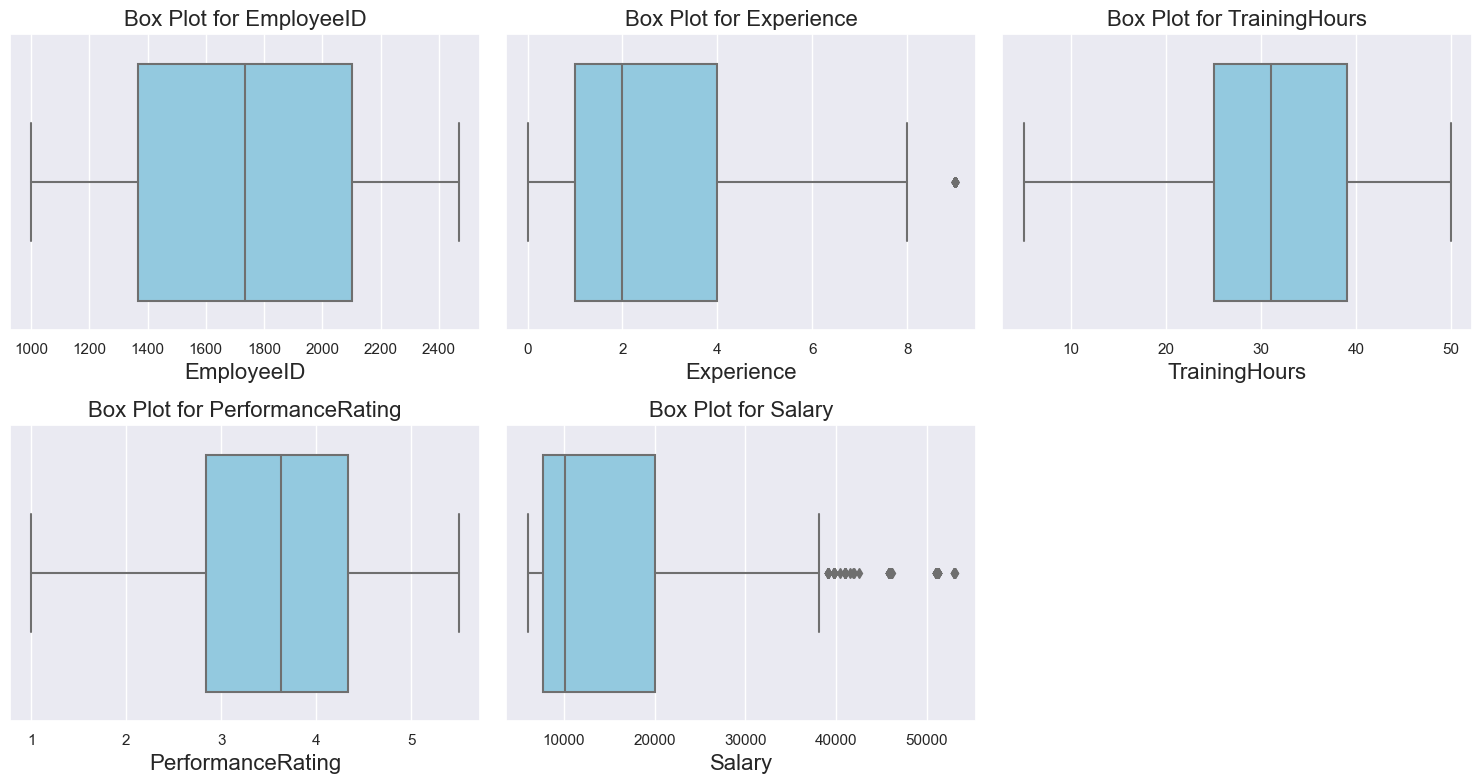

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
sns.set(style="darkgrid")

# Calculate the number of rows needed for the subplot grid for box plots
num_cols = 3  # Number of columns in the grid for box plots
num_rows = math.ceil(len(numeric_cols) / num_cols)

# Create subplots for box plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4*num_rows))

# Loop through numeric columns and create box plots
for i, col in enumerate(numeric_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=data[col], ax=ax, orient='vertical', color='skyblue')
    ax.set_title(f'Box Plot for {col}', fontsize=16)
    ax.set_xlabel(col, fontsize=16)

# Remove empty subplots if necessary
for i in range(len(numeric_cols), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()  # Ensures that the subplots don't overlap
plt.show()

In [20]:
#Step 2: Data Preprocessing and Visual Inspection - Outliers
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Calculate Z-scores
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())
# Set a Z-score threshold for outlier detection (e.g., 3)
z_score_threshold = 3
# Create a mask for outlier detection
outlier_mask = z_scores > z_score_threshold
num_of_outliers = outlier_mask.sum()
total_rows = data.shape[0]
percentage_outliers = (num_of_outliers / total_rows) * 100
print("\n\nTable 1.0 Number of Outliers at Z-score threshold of 3\n\n\n\n", num_of_outliers)
print("\n\n")



Table 1.0 Number of Outliers at Z-score threshold of 3



 EmployeeID           0
Experience           0
TrainingHours        0
PerformanceRating    0
Salary               7
dtype: int64





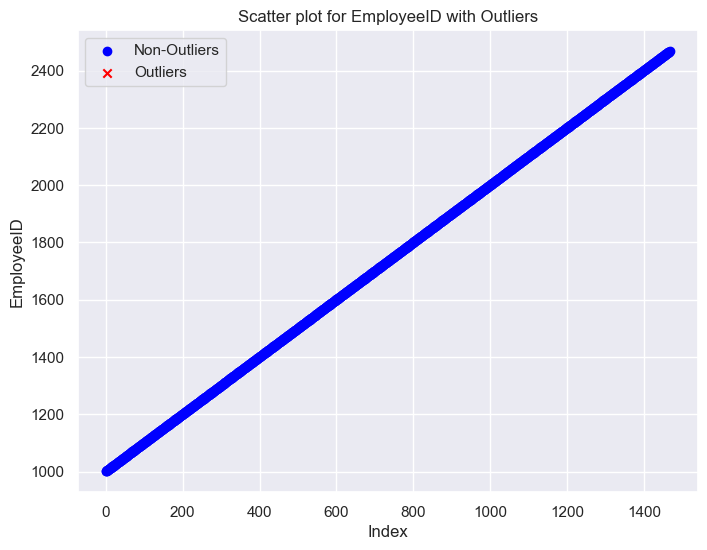

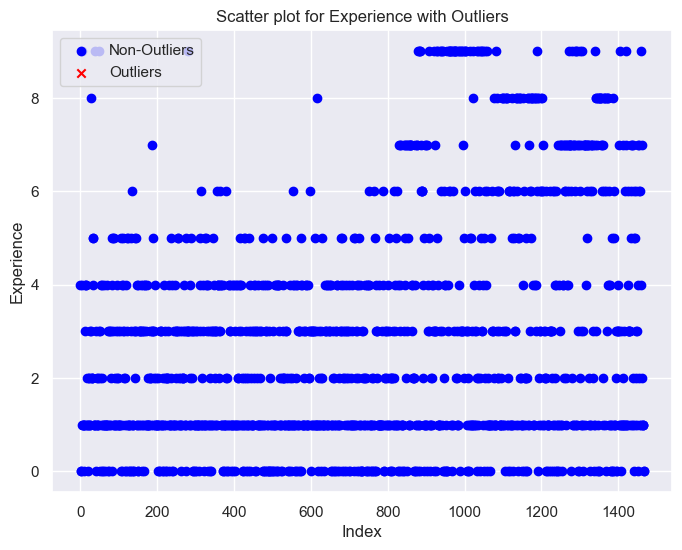

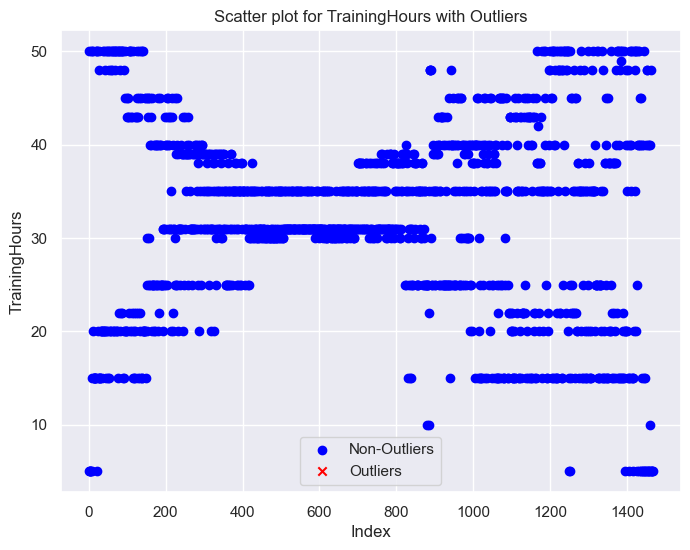

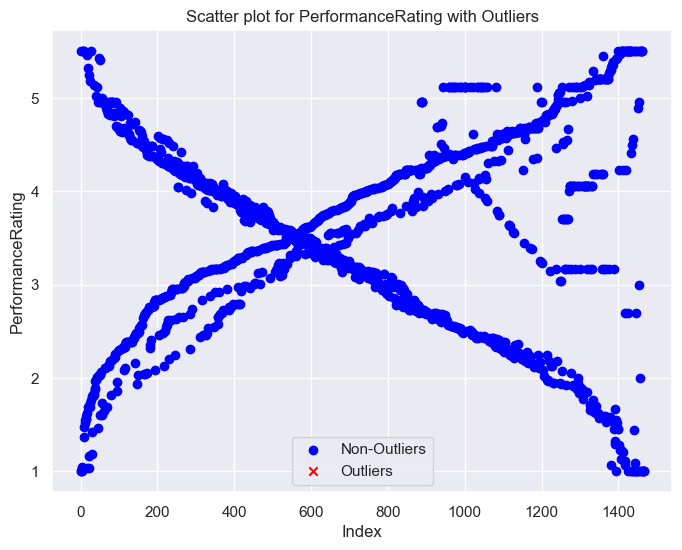

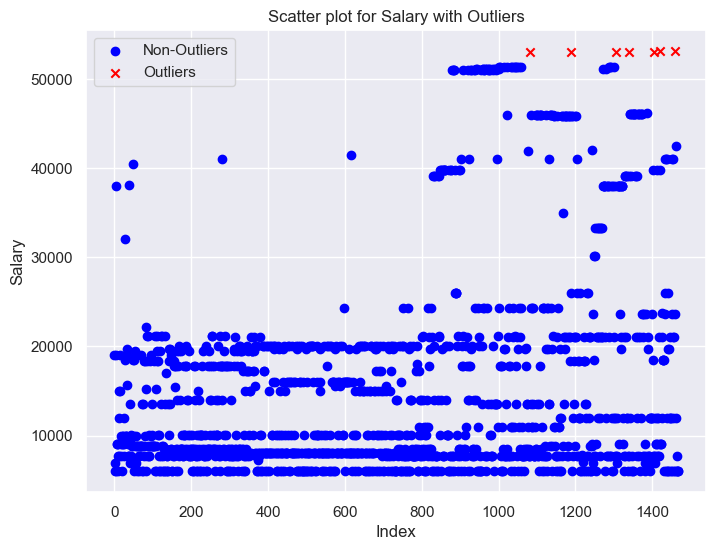

In [21]:
# Step 2: Data Preprocessing and Visual Inspection - Creating Individual Scatter Plots

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate Z-scores
z_scores = np.abs((data[numeric_cols] - data[numeric_cols].mean()) / data[numeric_cols].std())

# Set a Z-score threshold for outlier detection (e.g., 3)
z_score_threshold = 3

# Create a mask for outlier detection
outlier_mask = z_scores > z_score_threshold

# Scatterplot Visualization to identify outliers
for col in numeric_cols:
    # Scatter plot with different markers for outliers and non-outliers
    plt.figure(figsize=(8, 6))
    plt.scatter(data.index[~outlier_mask[col]], data[col][~outlier_mask[col]], marker='o', label='Non-Outliers', color='blue')
    plt.scatter(data.index[outlier_mask[col]], data[col][outlier_mask[col]], marker='x', label='Outliers', color='red')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter plot for {col} with Outliers')
    plt.legend()
    plt.show()


Skewness of EmployeeID: 0.0
Skewness of Experience: 0.944504511389569
Skewness of TrainingHours: -0.3803523023940388
Skewness of PerformanceRating: -0.3092405038415487
Skewness of Salary: 1.6296548175085646


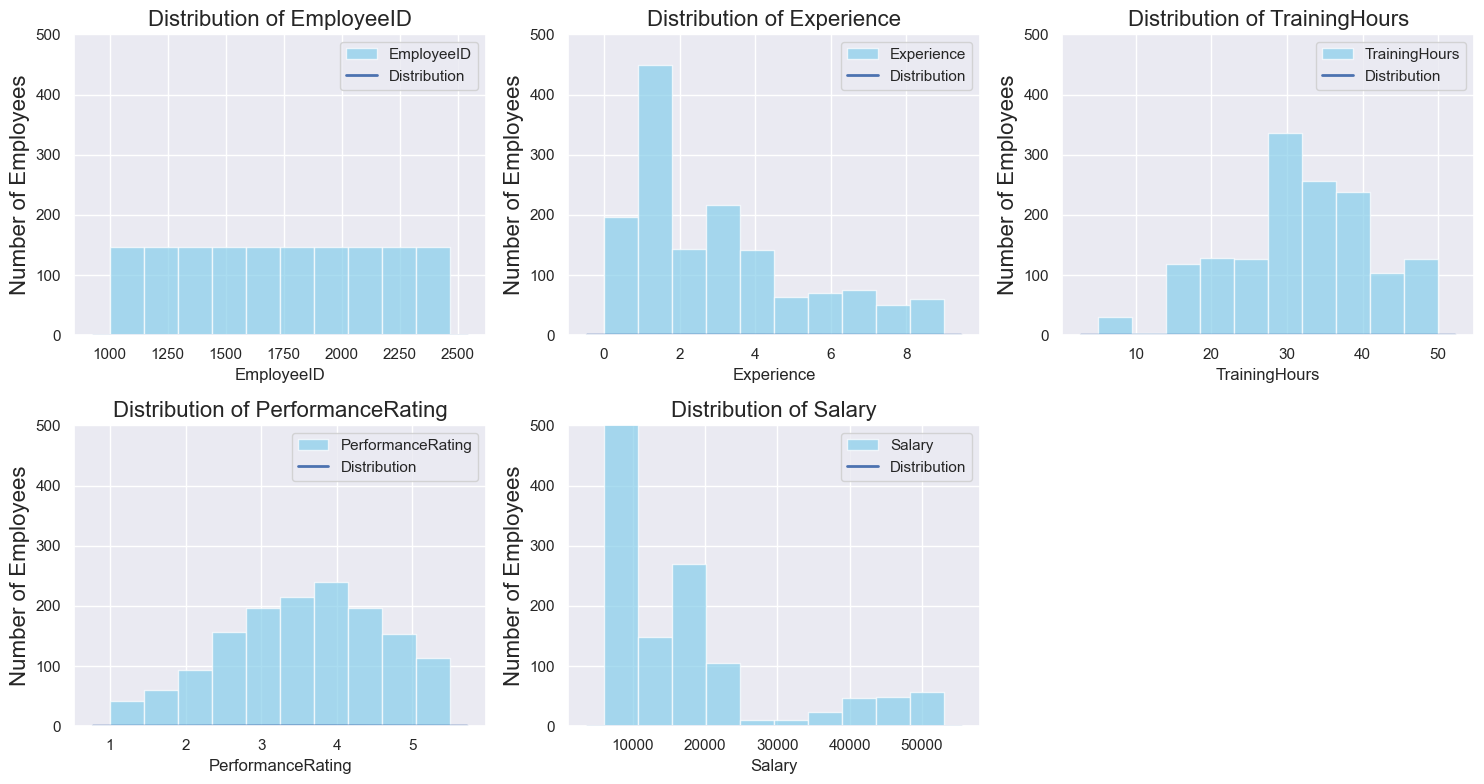

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import math

# Load the dataset
data = pd.read_csv("Employee_Performance.csv")

# Extract numeric columns from the dataset
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the number of rows needed for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = math.ceil(len(numeric_cols) / num_cols)

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Iterate through each numeric column and plot histograms with normal distribution curves
for i, col in enumerate(numeric_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]

    # Plot the histogram
    n, bins, patches = ax.hist(data[col], bins=10, alpha=0.7, color='skyblue', label=col)

    # Fit a normal distribution to the data
    mu, sigma = stats.norm.fit(data[col])
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)

    # Plot the normal distribution curve in blue
    ax.plot(x, p, 'b', linewidth=2, label='Distribution')

    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Number of Employees', fontsize=16)
    ax.set_title(f'Distribution of {col}', fontsize=16)
    ax.legend()
    ax.grid(True)

    # Calculate and print the skewness of the column
    col_skew = stats.skew(data[col])
    print(f"Skewness of {col}:", col_skew)

    # Set the y-axis limits from 0 to 500
    ax.set_ylim(0, 500)

# Remove empty subplots if necessary
for i in range(len(numeric_cols), num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axes[row_idx, col_idx])

plt.tight_layout()  # Adjust the layout
plt.show()




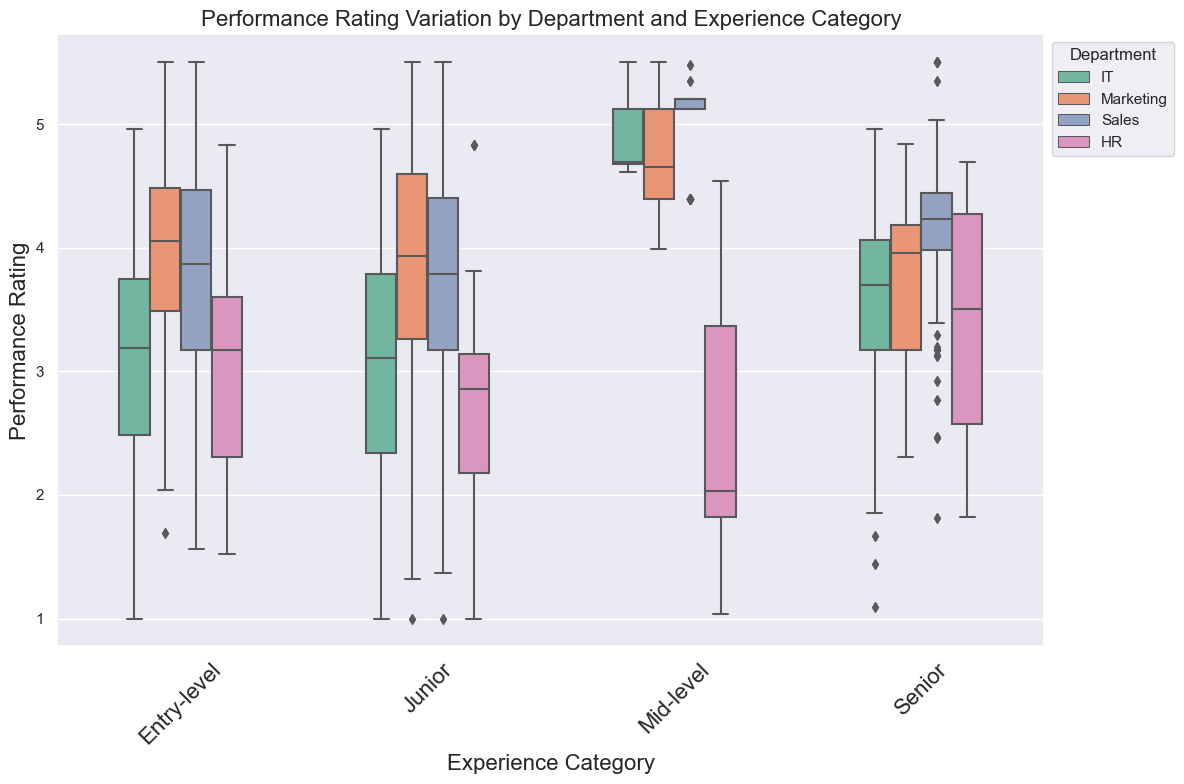

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("Employee_Performance.csv")

# Function to categorize experience levels
def categorize_experience(years):
    if years >= 8:
        return "Senior"
    elif 5 <= years < 8:
        return "Mid-level"
    elif 2 <= years < 5:
        return "Junior"
    else:
        return "Entry-level"

# Apply the function to create the 'Experience_Category' column
data['Experience_Category'] = data['Experience'].apply(categorize_experience)

# Create box plots to visualize the relationship between 'Department', 'Experience_Category', and 'PerformanceRating'
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=data, x='Experience_Category', y='PerformanceRating', hue='Department', palette='Set2', width=0.5)
ax.set_xticklabels(['Entry-level', 'Junior', 'Mid-level', 'Senior'], fontsize=16)  # Modify x-axis labels and font size
plt.xlabel('Experience Category', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Performance Rating', fontsize=16)  # Increase y-axis label font size
plt.title('Performance Rating Variation by Department and Experience Category', fontsize=16)  # Increase title font size
plt.xticks(rotation=45)
plt.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1), ncol=1) # Add legend for the department
plt.tight_layout()
plt.show()



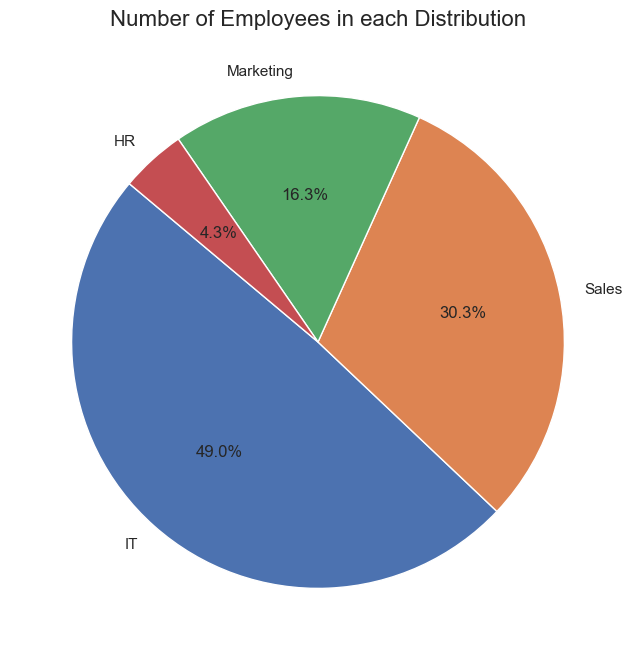

In [24]:
# Step 1: Prepare Data
# Assuming you have a DataFrame 'df' with a column 'component'
component_counts = data['Department'].value_counts()
# Step 2: Create the Pie Chart
plt.figure(figsize=(8, 8)) # Optional: Set the figure size
plt.pie(component_counts, labels=component_counts.index, autopct='%1.1f%%', startangle=140)
# Optional: Add a title
plt.title('Number of Employees in each Distribution', fontsize=16)
# Step 3: Display the Chart
plt.show()

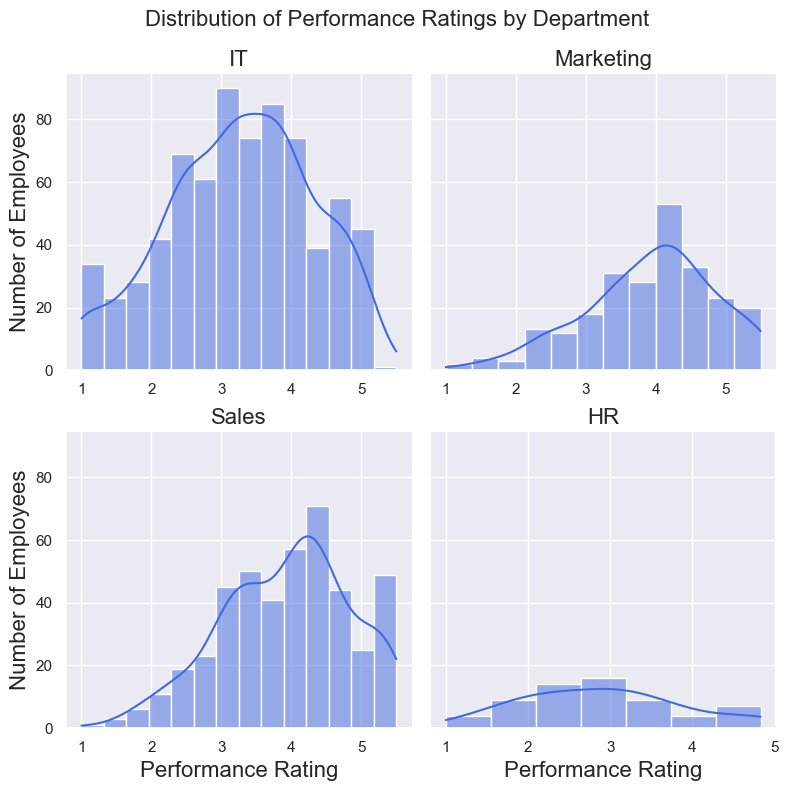

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Employee_Performance.csv")

# Create individual histograms and KDEs for each department
g = sns.FacetGrid(data, col="Department", col_wrap=2, height=4, sharex=False)
g.map_dataframe(sns.histplot, x="PerformanceRating", kde=True, color='royalblue')
g.set_axis_labels("Performance Rating", "Number of Employees")
g.set_titles(col_template="{col_name}", size=16)  # Set title font size
g.set_xlabels(fontsize=16)  # Set x-axis label font size
g.set_ylabels(fontsize=16)  # Set y-axis label font size
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Performance Ratings by Department', fontsize=16)  # Set main title font size
plt.show()


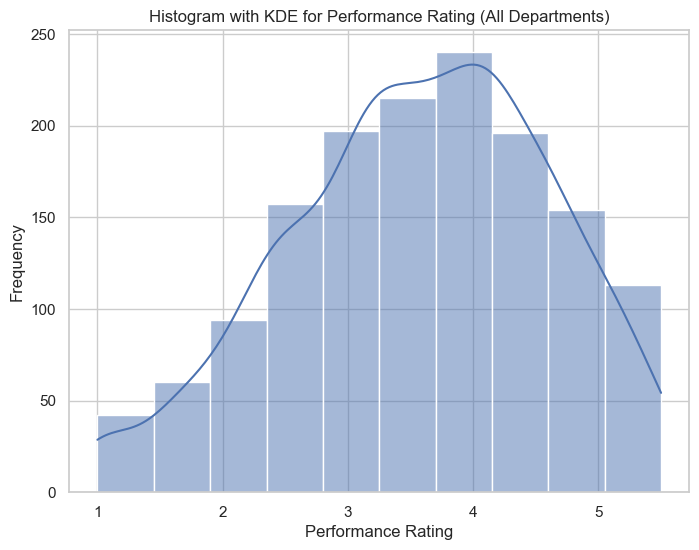

Skewness for IT: -0.22693394147167154
Skewness for Marketing: -0.4734238106095677
Skewness for Sales: -0.33037414126286885
Skewness for HR: 0.26630959399020243


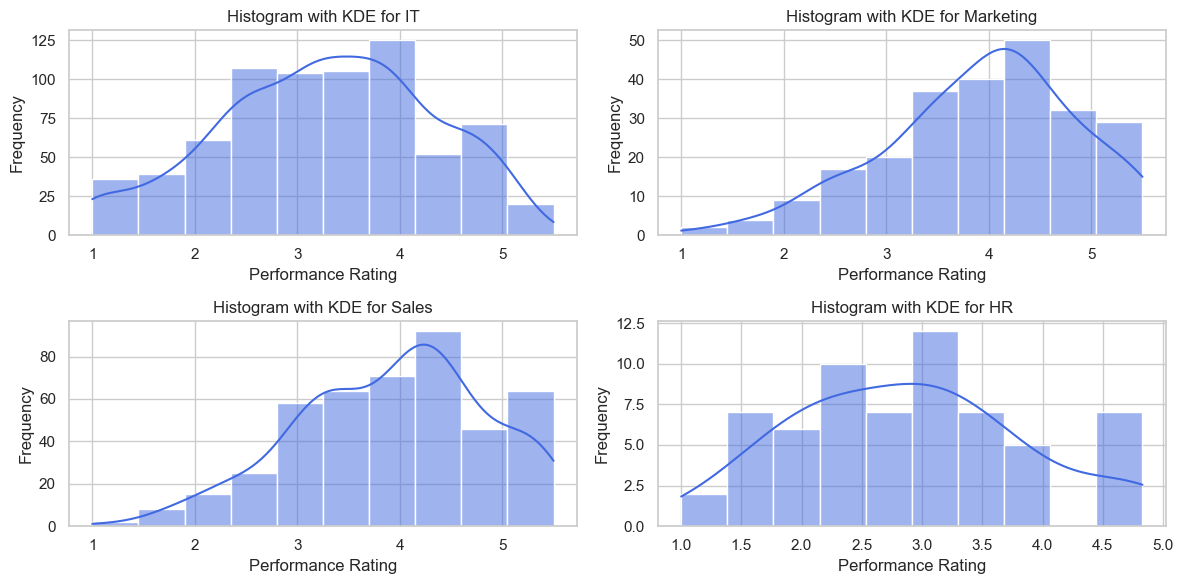



The histogram with all the Performance Ratings for all departments shows a normal distribution, although the histogram shows a slight positive skew.

Individually, the results overall show a normal distribution.


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Load the dataset
data = pd.read_csv("Employee_Performance.csv")

# Set the style for the plots
sns.set(style="whitegrid")

# Create a histogram plot with KDE for PerformanceRating regardless of department
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='PerformanceRating', kde=True, bins=10)
plt.title('Histogram with KDE for Performance Rating (All Departments)')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

# Create a separate histogram plot with KDE for each department
plt.figure(figsize=(12, 6))

# Define the department groups
department_groups = data['Department'].unique()

# Plot each department group
for department in department_groups:
    plt.subplot(2, 2, list(department_groups).index(department) + 1)  # Adjust the subplot layout as needed
    sns.histplot(data=data[data['Department'] == department], x='PerformanceRating', kde=True, bins=10, color='royalblue')
    plt.title(f'Histogram with KDE for {department}')
    plt.xlabel('Performance Rating')
    plt.ylabel('Frequency')
    
    # Calculate the skewness
    data_subset = data[data['Department'] == department]['PerformanceRating']
    skewness = skew(data_subset)
    print(f"Skewness for {department}: {skewness}")

plt.tight_layout()  # Adjust subplot spacing
plt.show()

print("\n\nThe histogram with all the Performance Ratings for all departments shows a normal distribution, although the histogram shows a slight positive skew.")
print("\nIndividually, the results overall show a normal distribution.")


In [30]:
from scipy.stats import skew

# Load the dataset
data = pd.read_csv("Employee_Performance.csv")

# Calculate the skewness of the PerformanceRating column
performance_skew = skew(data['PerformanceRating'])
print(f"Skewness of the Performance Rating histogram for all departments: {performance_skew}")

Skewness of the Performance Rating histogram for all departments: -0.3092405038415487


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.stats.multicomp import MultiComparison

In [33]:

# Get unique values in the "Stream" column
department_values = df['Department'].unique()

# Display the unique stream values
print("Unique department Values:")
print(department_values)

print("\n")

print(df.info())


Unique department Values:
['IT' 'Marketing' 'Sales' 'HR']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


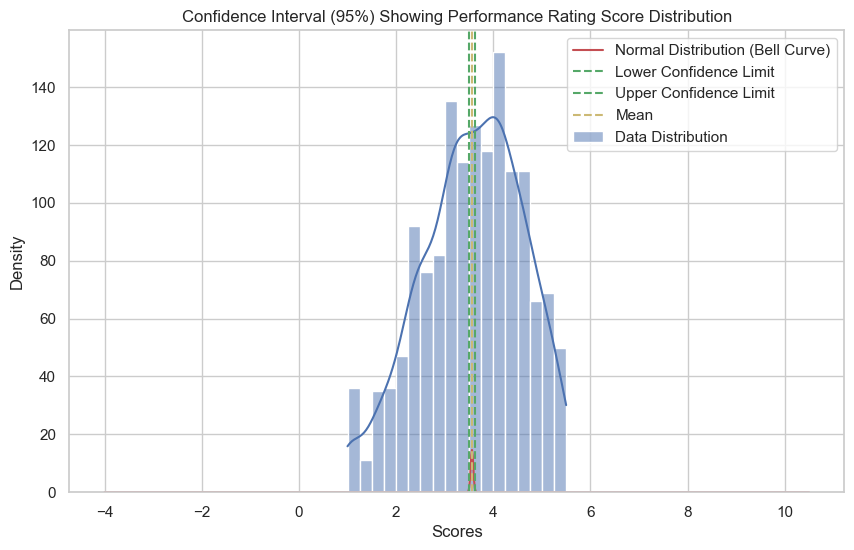

In [34]:
##### IGNORE THIS CELL #######

# Read the CSV file into a DataFrame
df = pd.read_csv('Employee_Performance.csv', na_values='?')

# Extract the 'PerformanceRating' column
performance_ratings = df['PerformanceRating'].values

# Calculate the mean and standard error of the mean (SEM)
mean = np.mean(performance_ratings)
sem = stats.sem(performance_ratings)

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, df=len(performance_ratings) - 1) * sem

# Calculate the confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Create a range of values for the x-axis (assuming a normal distribution)
x = np.linspace(min(performance_ratings) - 5, max(performance_ratings) + 5, 1000)

# Create the probability density function (PDF) for a normal distribution
pdf = stats.norm.pdf(x, loc=mean, scale=sem)

# Create a plot showing the data distribution, bell curve, confidence interval, and mean
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
sns.histplot(performance_ratings, kde=True, color='b', label='Data Distribution')

# Plot the bell curve (normal distribution)
plt.plot(x, pdf, 'r-', label='Normal Distribution (Bell Curve)')

# Plot vertical lines for the confidence interval and mean
plt.axvline(confidence_interval[0], color='g', linestyle='--', label='Lower Confidence Limit')
plt.axvline(confidence_interval[1], color='g', linestyle='--', label='Upper Confidence Limit')
plt.axvline(mean, color='y', linestyle='--', label='Mean')

# Add labels, legend, and title
plt.xlabel('Scores')
plt.ylabel('Density')
plt.title(f'Confidence Interval ({int(confidence_level * 100)}%) Showing Performance Rating Score Distribution')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


In [36]:

# Get unique values in the "Stream" column
department_values = df['Department'].unique()

# Display the unique stream values
print("Unique department Values:")
print(department_values)

print("\n")

print(df.info())


Unique department Values:
['IT' 'Marketing' 'Sales' 'HR']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB
None


In [37]:
# Import necessary library for ANOVA
from scipy.stats import f_oneway

alpha = 0.05
department_counts = {}

# Perform one-way ANOVA on the test scores of the departments
grouped_data = [df[df['Department'] == department]['PerformanceRating'] for department in department_values]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Loop through unique department values
for department in df['Department'].unique():
    # Count the occurrences of the current stream and store it in the dictionary
    count = len(df[df['Department'] == department])
    department_counts[department] = count

# Print the department counts
for department, count in department_counts.items():
    print(f"Department {department}: {count} observations")



print("\nOne-way ANOVA Results based on p-value:")
#print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:}")
print(f"Alpha: {alpha}")


#Step 1.6
# Interpret the results using the information provided on page 2 of the lab task as a general guide.
alpha = 0.05
if p_value < alpha:
    print("Reject Null-Hypothesis: There is a significant difference between the departments.")
else:
    print("Accept Null-Hypothesis: There is no significant difference between the departments.")

Department IT: 720 observations
Department Marketing: 240 observations
Department Sales: 445 observations
Department HR: 63 observations

One-way ANOVA Results based on p-value:
P-value: 2.0167687802345036e-37
Alpha: 0.05
Reject Null-Hypothesis: There is a significant difference between the departments.


In [38]:
# Degrees of freedom
df_between = len(department_values) - 1
df_within = len(df) - len(department_values)

# Calculate the critical F-value based on alpha and degrees of freedom
critical_f_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Print the results
print("One-way ANOVA Results based on f-statistic:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"Critical F-value: {critical_f_value:.2f}")
print(f"P-value: {p_value:}")

# Compare F-statistic to the critical F-value and make the decision
if f_statistic > critical_f_value:
    print("Reject Null")
else:
    print("Accept Null")

One-way ANOVA Results based on f-statistic:
F-statistic: 61.45
Critical F-value: 2.61
P-value: 2.0167687802345036e-37
Reject Null


In [39]:
# Perform Tukey's HSD post hoc test
multicomp = MultiComparison(df['PerformanceRating'], df['Department'])
result = multicomp.tukeyhsd()

# Display the results
print("\nTukey's HSD Post Hoc Test:")
print(result)


Tukey's HSD Post Hoc Test:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
       HR        IT   0.3715 0.0217  0.0384 0.7047   True
       HR Marketing    1.027    0.0  0.6681  1.386   True
       HR     Sales   1.0256    0.0  0.6843 1.3669   True
       IT Marketing   0.6555    0.0  0.4665 0.8445   True
       IT     Sales   0.6541    0.0  0.5012  0.807   True
Marketing     Sales  -0.0014    1.0 -0.2044 0.2017  False
---------------------------------------------------------


In [40]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from scipy import stats

In [43]:
#Load the dataset

df = pd.read_csv("Employee_Performance.csv")

C:\Users\William\AppData\Local\Temp\ipykernel_17508\521616951.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


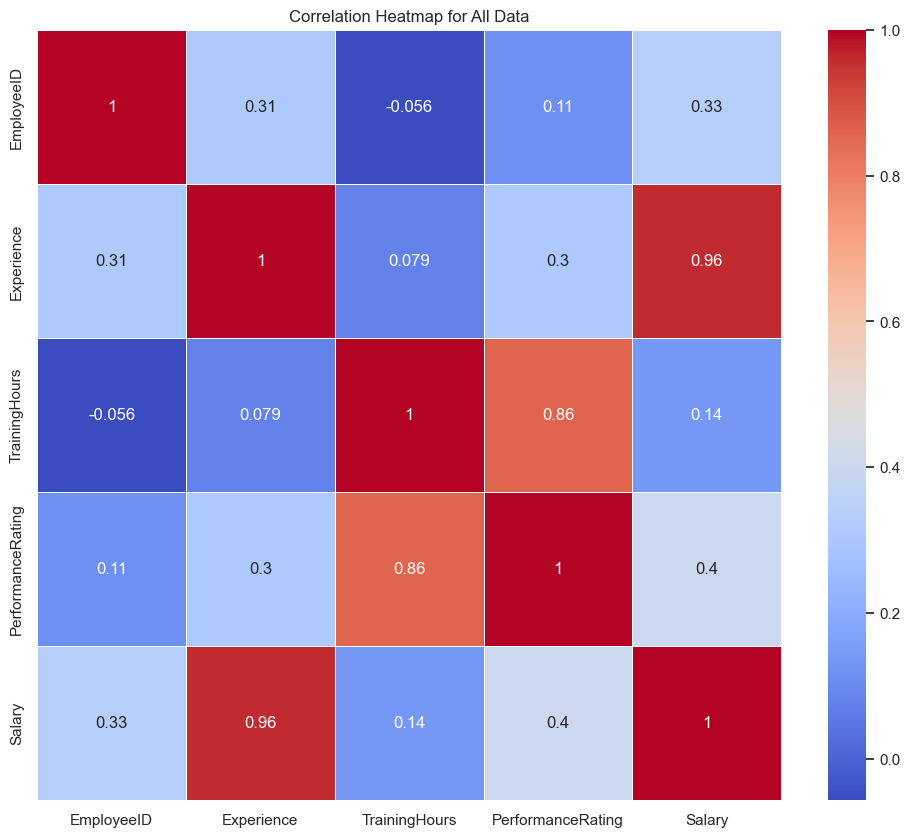

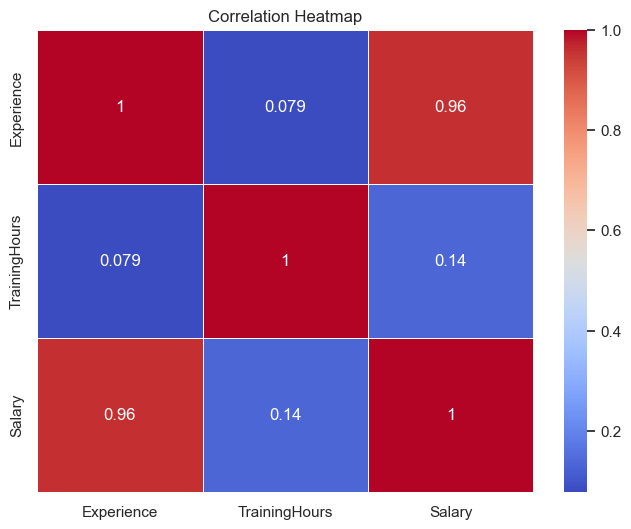

In [44]:

# Task 2: Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for All Data')
plt.savefig('corr_heat_matrix.png')
plt.show()


# Select independent variables
X = df[['Experience', 'TrainingHours', 'Salary']]
# Dependent variable
y = df['PerformanceRating']

# Check for multicollinearity using a heatmap
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig('corrlation_heatmap.png')
plt.show()





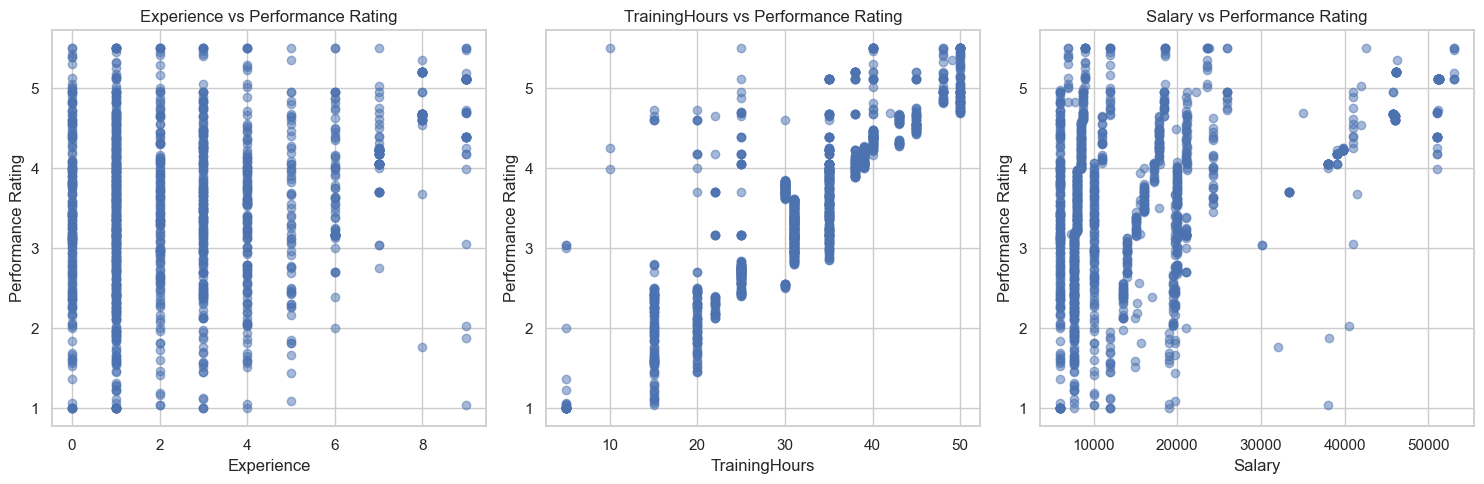

In [45]:
# Create scatterplots for each independent variable against the dependent variable to check linearity visually
fig, axes = plt.subplots(nrows=1, ncols=len(X.columns), figsize=(15, 5))

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], y, alpha=0.5)
    axes[i].set_title(f'{col} vs Performance Rating')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Performance Rating')

plt.tight_layout()
plt.savefig('scatterplot.png')
plt.show()

In [46]:
# Calculate VIF for each independent variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Exclude the dependent variable from the predictors
X_for_vif = X

# Calculate VIF
vif_results = calculate_vif(X_for_vif)

# Display VIF results
print("VIF Results:")
print(vif_results)


# Import necessary library for regression
import statsmodels.api as sm

# Select predictor variables(TrainingHours, Salary)
X = df[['TrainingHours','Salary']]

# Add a constant term to the predictors
X = sm.add_constant(X)

# Dependent variable
y = df['PerformanceRating']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())



VIF Results:
        Variable        VIF
0     Experience  29.155744
1  TrainingHours   2.973354
2         Salary  35.828265
                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     3412.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:41:07   Log-Likelihood:                -874.98
No. Observations:                1468   AIC:                             1756.
Df Residuals:                    1465   BIC:                             1772.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---

In [47]:
# Select predictor variables(TrainingHours, Experience)
X = df[['TrainingHours','Experience']]

# Add a constant term to the predictors
X = sm.add_constant(X)

# Dependent variable
y = df['PerformanceRating']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression results
print(model.summary())


# Calculate VIF for each independent variable
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Exclude the constant term from the predictors
X_for_vif = X.drop('const', axis=1)

# Calculate VIF
vif_results = calculate_vif(X_for_vif)

# Display VIF results
print("VIF Results:")
print(vif_results)




                            OLS Regression Results                            
Dep. Variable:      PerformanceRating   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2837.
Date:                Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:41:19   Log-Likelihood:                -984.63
No. Observations:                1468   AIC:                             1975.
Df Residuals:                    1465   BIC:                             1991.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4880      0.043     11.446

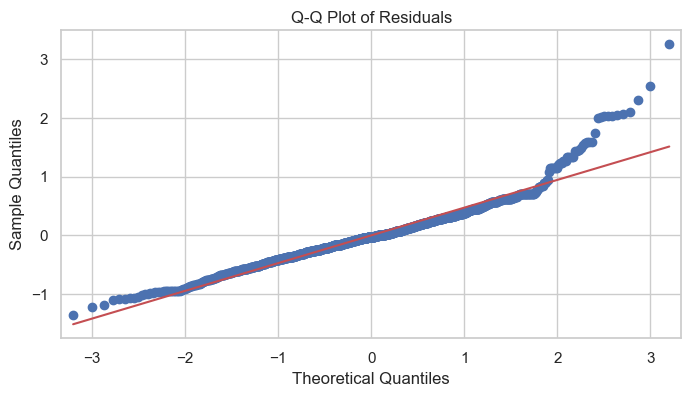

Anderson-Darling Statistic: 10.5854340041451
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]


In [48]:
# Task 3: Get the residuals
residuals = model.resid

# Residual plot for normality check
# Create a Q-Q plot to check for normality
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Perform the Anderson-Darling test for normality
result = stats.anderson(residuals, dist='norm')

# Extract the test statistic, critical values, and significance levels
ad_statistic = result.statistic
ad_critical_values = result.critical_values
ad_significance_levels = result.significance_level

print("Anderson-Darling Statistic:", ad_statistic)
print("Critical Values:", ad_critical_values)
print("Significance Levels:", ad_significance_levels)

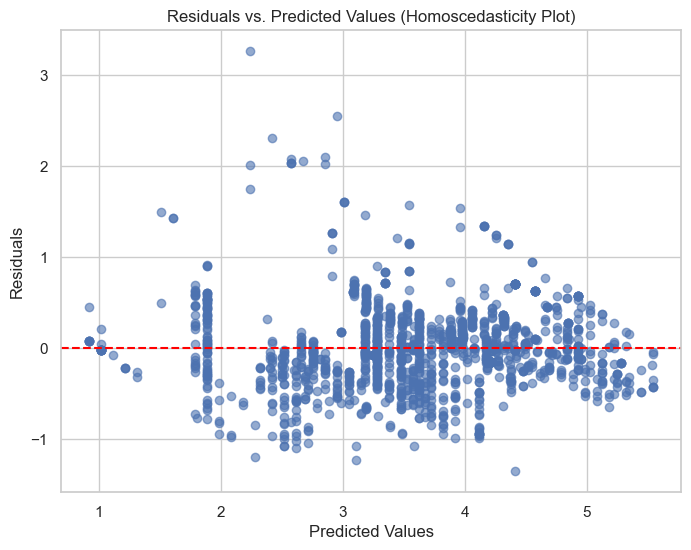

In [49]:
import scipy.stats as stats

# Get the predicted (fitted) values from the model for homoscediscity
predicted_values = model.fittedvalues

# Get the residuals from the model
residuals = model.resid

# Create a scatterplot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values (Homoscedasticity Plot)")
plt.show()

